In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import display, HTML
warnings.filterwarnings("ignore")

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and
covariance matrix. These parameters are analogous to the mean (average or "center") and variance (standard deviation, or "width," squared) of the one-dimensional normal distribution.

# 

Read the files labeled as 'sampleX.txt' using numpy or pandas and plot them.

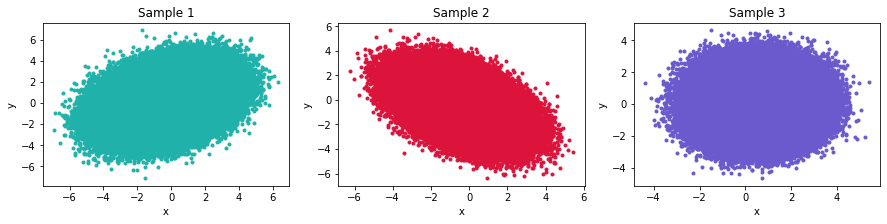

In [2]:
def read_txt(path,index):
    with open(path.format(index)) as t:
        l = t.readlines()
    x,y,L=[],[],l[1:]
    for i in L:
        i = i.replace('\n','')
        a,b = i.split()
        x.append(float(a)) ; y.append(float(b))
    return np.array(x),np.array(y)

path = '/Users/apple/Documents/SBU/Mine/hw5-hastihojabr-main/sample{}.txt'
x1,y1 = read_txt(path,1) ; x2,y2 = read_txt(path,2) ; x3,y3 = read_txt(path,3)

fig = plt.figure(figsize=(15, 3))
for x,y,axis,c in zip([x1,x2,x3],[y1,y2,y3],range(1,4),['lightseagreen','crimson','slateblue']):
    ax =  fig.add_subplot(1, 3, axis )
    plt.scatter(x,y,color=c,marker='.')
    plt.xlabel('x') ; plt.ylabel('y')
    plt.title('Sample {}'.format(axis))



Determine whether each sample is correlated, anticorrelated or uncorrelated.

In [3]:
def Pearson_correlation_coefficient(x,y,name):
    coef = np.mean((x-np.mean(x))*(y-np.mean(y)))/np.std(x)/np.std(y)
    coef = round(coef,1)
    if coef==0: print(name,"is uncorrelated with Pearson correlation coefficient of {}.".format(coef))
    elif coef>0: print(name,"is correlated with Pearson correlation coefficient of {}.".format(coef))
    else: print(name,"is anticorrelated with Pearson correlation coefficient of {}.".format(coef))

In [4]:
Pearson_correlation_coefficient(x1,y1,'Sample 1')
Pearson_correlation_coefficient(x2,y2,'Sample 2')
Pearson_correlation_coefficient(x3,y3,'Sample 3')

Sample 1 is correlated with Pearson correlation coefficient of 0.3.
Sample 2 is anticorrelated with Pearson correlation coefficient of -0.5.
Sample 3 is uncorrelated with Pearson correlation coefficient of 0.0.


## 3d Plot
Plot the joint probability distribution of each sample in 3D. For this you can use 'plot_surface' found in matplotlib library.

If you want to plot using matplotlib, the codes below will come in handy. First line makes sure that your plots are interactive, second line provides color maps.

In [5]:
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize

At the first step try to get the 2D histogram of your data. (Hint: beware of different sizes of arrays!)

In [4]:
bins=100
joint1,x11,y11 = np.histogram2d(x1, y1, bins=bins,density=True)
joint2,x22,y22 = np.histogram2d(x2, y2, bins=bins,density=True)
joint3,x33,y33 = np.histogram2d(x3, y3, bins=bins,density=True)

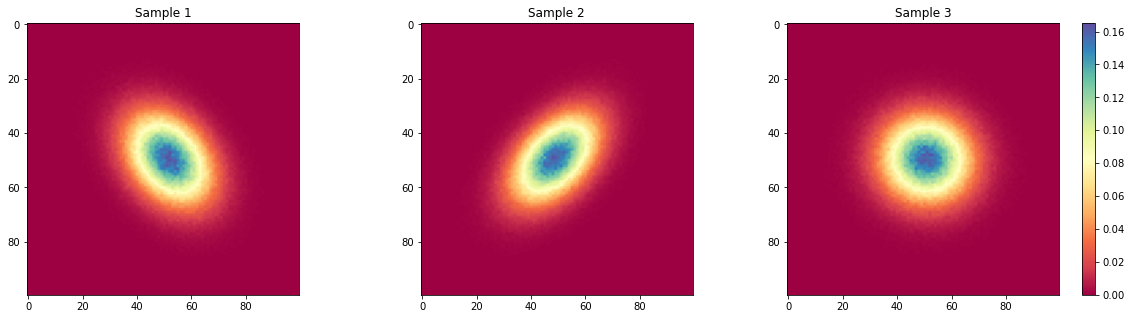

In [7]:
fig = plt.figure(figsize=(20, 5))
for j,axis in zip([joint1,joint2,joint3],range(1,4)):
    ax =  fig.add_subplot(1, 3, axis )
    im = plt.imshow(j,'Spectral')
    plt.title('Sample {}'.format(axis))
plt.colorbar(im, fraction=0.1, pad=0.07)
plt.show()

Now you can plot the 3D histogram:

In [8]:
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize

def histogram_3D(x,y,name,color,bins,ax):
    #fig = plt.figure(figsize=(6, 6))
    #ax = fig.add_subplot(111, projection='3d')
    Z,x,y = np.histogram2d(x, y, bins=bins,density=True)
    X, Y = np.meshgrid(x[:-1], y[:-1])
    mycmap = plt.get_cmap(color)
    s = ax.plot_surface(X, Y, Z,cmap=mycmap)
    fig.colorbar(s, fraction=0.03, pad=0.07)
    ax.set_title(name)
    #plt.show()

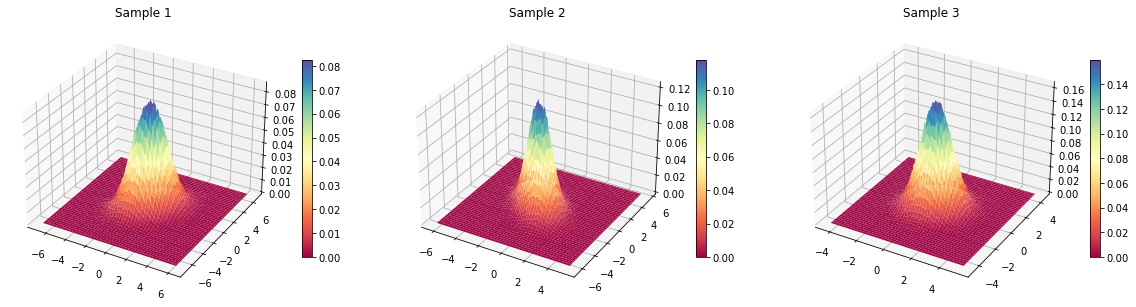

In [9]:
fig = plt.figure(figsize=(20, 5))
for x,y,axis in zip([x1,x2,x3],[y1,y2,y3],range(1,4)):
    ax =  fig.add_subplot(1, 3, axis ,projection='3d')
    histogram_3D(x,y,'Sample {}'.format(axis),'Spectral',100,ax)


Using the calculated histograms, now write a code to calculate the marginalized PDFs along both axes and then plot them.

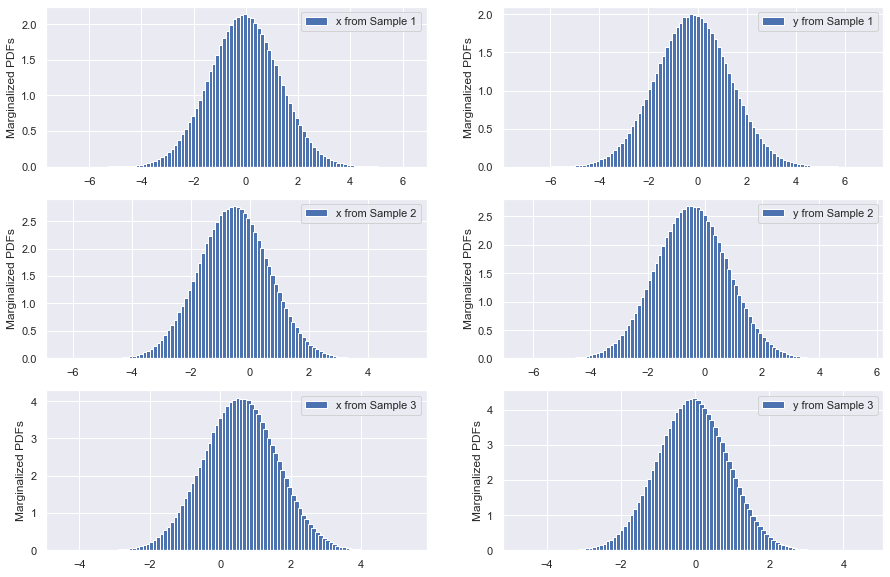

In [12]:
%matplotlib inline
sns.set()
fig = plt.figure(figsize=(15, 10))
for i,j,index,axis,name,data in zip([x11,y11,x22,y22,x33,y33],
                          [joint1,joint1,joint2,joint2,joint3,joint3],
                          [0,1,0,1,0,1],range(1,8),['x','y','x','y','x','y'],[1,1,2,2,3,3]):
    ax =  fig.add_subplot(3, 2, axis )
    marj = np.average(j, axis=index)
    plt.bar(i[:-1],marj*100,width=0.14,label='{} from Sample {}'.format(name,data))
    plt.ylabel('Marginalized PDFs')
    plt.legend()
plt.show()

## Extra example:

You can also combine the two steps above and plot the joint PDF and the marginalized ones altogether using seaborn.

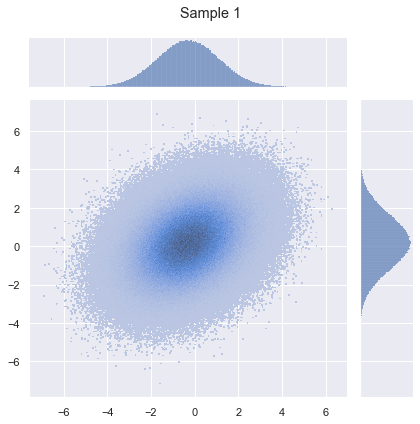

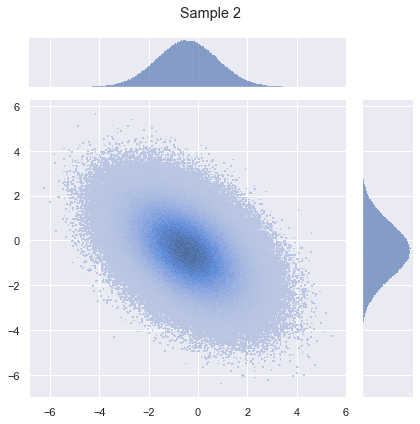

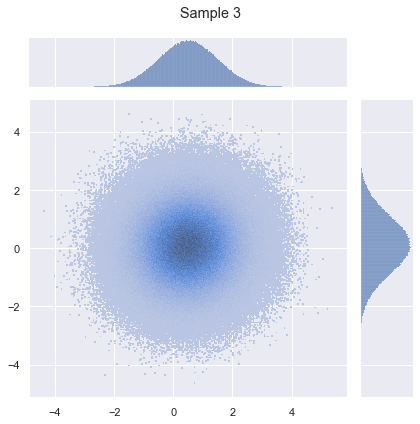

In [13]:
g1 = sns.jointplot(data=[x1,y1], x=x1, y=y1, kind='hist')
g1.fig.suptitle('Sample 1')
g1.fig.tight_layout()

g2 = sns.jointplot(data=[x2,y2], x=x2, y=y2, kind='hist')
g2.fig.suptitle('Sample 2')
g2.fig.tight_layout()

g3 = sns.jointplot(data=[x3,y3], x=x3, y=y3, kind='hist')
g3.fig.suptitle('Sample 3')
g3.fig.tight_layout()

plt.show()

## Contour Plots

Plot the contours of the datasets showing different values of contours.

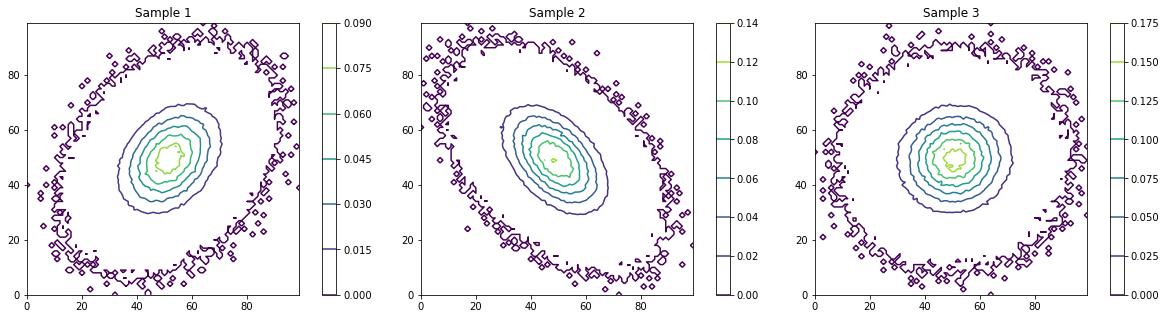

In [5]:
fig = plt.figure(figsize=(20, 5))
for j,axis in zip([joint1,joint2,joint3],range(1,4)):
    ax =  fig.add_subplot(1, 3, axis )
    im = plt.contour(j)
    plt.title('Sample {}'.format(axis))
    plt.colorbar(im, fraction=0.1, pad=0.07)
plt.show()


## 3 parts
In the multivariate case, a gaussian distribution is defined via a mean and a covrience matrix. Here the covarience matrix is the equivalant of varience in higher dimensions. To refresh your mind, take a look at the [Wikipedia page](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Notation_and_parameterization). A correlation matrix is very similiar but has some [subtle differences](https://en.wikipedia.org/wiki/Correlation#Correlation_matrices). 

Now using those defenitions, find the **covariance** (part 1) and **correlation** (part 2) matrices for each distribution. Are they the same? why? (part 3)

(Hint 1: You may find scipy.stats useful)

(Hint 2: Study the lecture note titled: 'parameter estimation 7' once more)

(Hint 3: [This lecture note](https://pages.ucsd.edu/~rlevy/lign251/fall2007/lecture_4.pdf) may also be useful, althogh the codes aren't written in python)

In [7]:
#Cov(X, Y) = E[(X − E(X))(Y − E(Y))]
def covariance(x,y):
    cov=np.zeros((2,2))
    cov[0][0]= np.mean((x-np.mean(x))*(x-np.mean(x)))
    cov[0][1]= np.mean((x-np.mean(x))*(y-np.mean(y)))
    cov[1][1]= np.mean((y-np.mean(y))*(y-np.mean(y)))
    cov[1][0]= cov[0][1]
    return cov

print('Sample 1 covariance:\n',np.round(covariance(x1,y1),2),'\n')
print('Sample 2 covariance:\n',np.round(covariance(x2,y2),2),'\n')
print('Sample 3 covariance:\n',np.round(covariance(x3,y3),2))

Sample 1 covariance:
 [[2.   0.65]
 [0.65 2.  ]] 

Sample 2 covariance:
 [[ 1.5  -0.71]
 [-0.71  1.5 ]] 

Sample 3 covariance:
 [[1.   0.03]
 [0.03 1.  ]]


In [8]:
#Corr(X,Y) = E[(X − E(X))(Y − E(Y ))]/(std(X)std(Y))
def correlation(x,y):
    cov=np.zeros((2,2))
    cov[0][0]= np.mean((x-np.mean(x))*(x-np.mean(x)))/np.std(x)/np.std(x)
    cov[0][1]= np.mean((x-np.mean(x))*(y-np.mean(y)))/np.std(x)/np.std(y)
    cov[1][1]= np.mean((y-np.mean(y))*(y-np.mean(y)))/np.std(y)/np.std(y)
    cov[1][0]= cov[0][1]
    return cov

print('Sample 1 correlation:\n',np.round(correlation(x1,y1),2),'\n')
print('Sample 2 correlation:\n',np.round(correlation(x2,y2),2),'\n')
print('Sample 3 correlation:\n',np.round(correlation(x3,y3),2))

Sample 1 correlation:
 [[1.   0.33]
 [0.33 1.  ]] 

Sample 2 correlation:
 [[ 1.   -0.47]
 [-0.47  1.  ]] 

Sample 3 correlation:
 [[1.   0.03]
 [0.03 1.  ]]


They are not the same but they can be related by this formula: Corr(X,Y) = Cov(X,Y)/(std(X)std(Y))

In [9]:
def corr_cov(x,y):
    return covariance(x,y)/np.std(x)/np.std(y)
print('Sample 1 correlation using covatiance:\n',np.round(corr_cov(x1,y1),2),'\n')
print('Sample 2 correlation using covatiance:\n',np.round(corr_cov(x2,y2),2),'\n')
print('Sample 1 correlation using covatiance:\n',np.round(corr_cov(x3,y3),2),'\n')

Sample 1 correlation using covatiance:
 [[1.   0.33]
 [0.33 1.  ]] 

Sample 2 correlation using covatiance:
 [[ 1.   -0.47]
 [-0.47  1.  ]] 

Sample 1 correlation using covatiance:
 [[1.   0.03]
 [0.03 1.  ]] 




## 2 parts

Now, only focus on the positievly correlated distribution. If the errors along both of the axes are huge, (as discussed in the lecture 'parameter estimation 7'), Is there a linear combination of the two parameters that can be well constrained? Discuss it (part 1).  Find the mode of the distribution (part 2)


خطای طبق فرمولی که در لکچر نوت اومده وابسطه به پارامتر های بیضی است. هرچقدر بیضی کشیده تر باشه انحراف معیار یا خطای ما بیشتره پس درواقع ما نمیتونیم اطلاعات خوبی از مولفه های ایکس و ایگرگ بدست بیاریم. کاری که باید انجام بدیم عوض کردن مختصات است به گونه ای که با محور های بیضی موازی باشد.(شکل صفحه ۹) در نتیجه ما میتونیم اطلاعاتی راجع به ترکیب های خطی ایکس و ایگرگ بدست بیاوریم و خطا کاهش پیدا میکند. 

In [231]:
from scipy import stats

m = stats.mode(x1)
print('mode:',m[0][0])

mode: -0.08382913


# Real World
let's apply this to real world data and using house price data. first import house_data.csv

In [12]:
path = '/Users/apple/Documents/SBU/Mine/hw5-hastihojabr-main/House_price.csv'
df1 = pd.read_csv(path,encoding='latin-1')
df1.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


you can see detail of your dataframe with the code below

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now select the columns of the train set with numerical data

In [216]:
n = df1.select_dtypes(include=['float64','int']).columns

Plot the distribution of all the numerical data

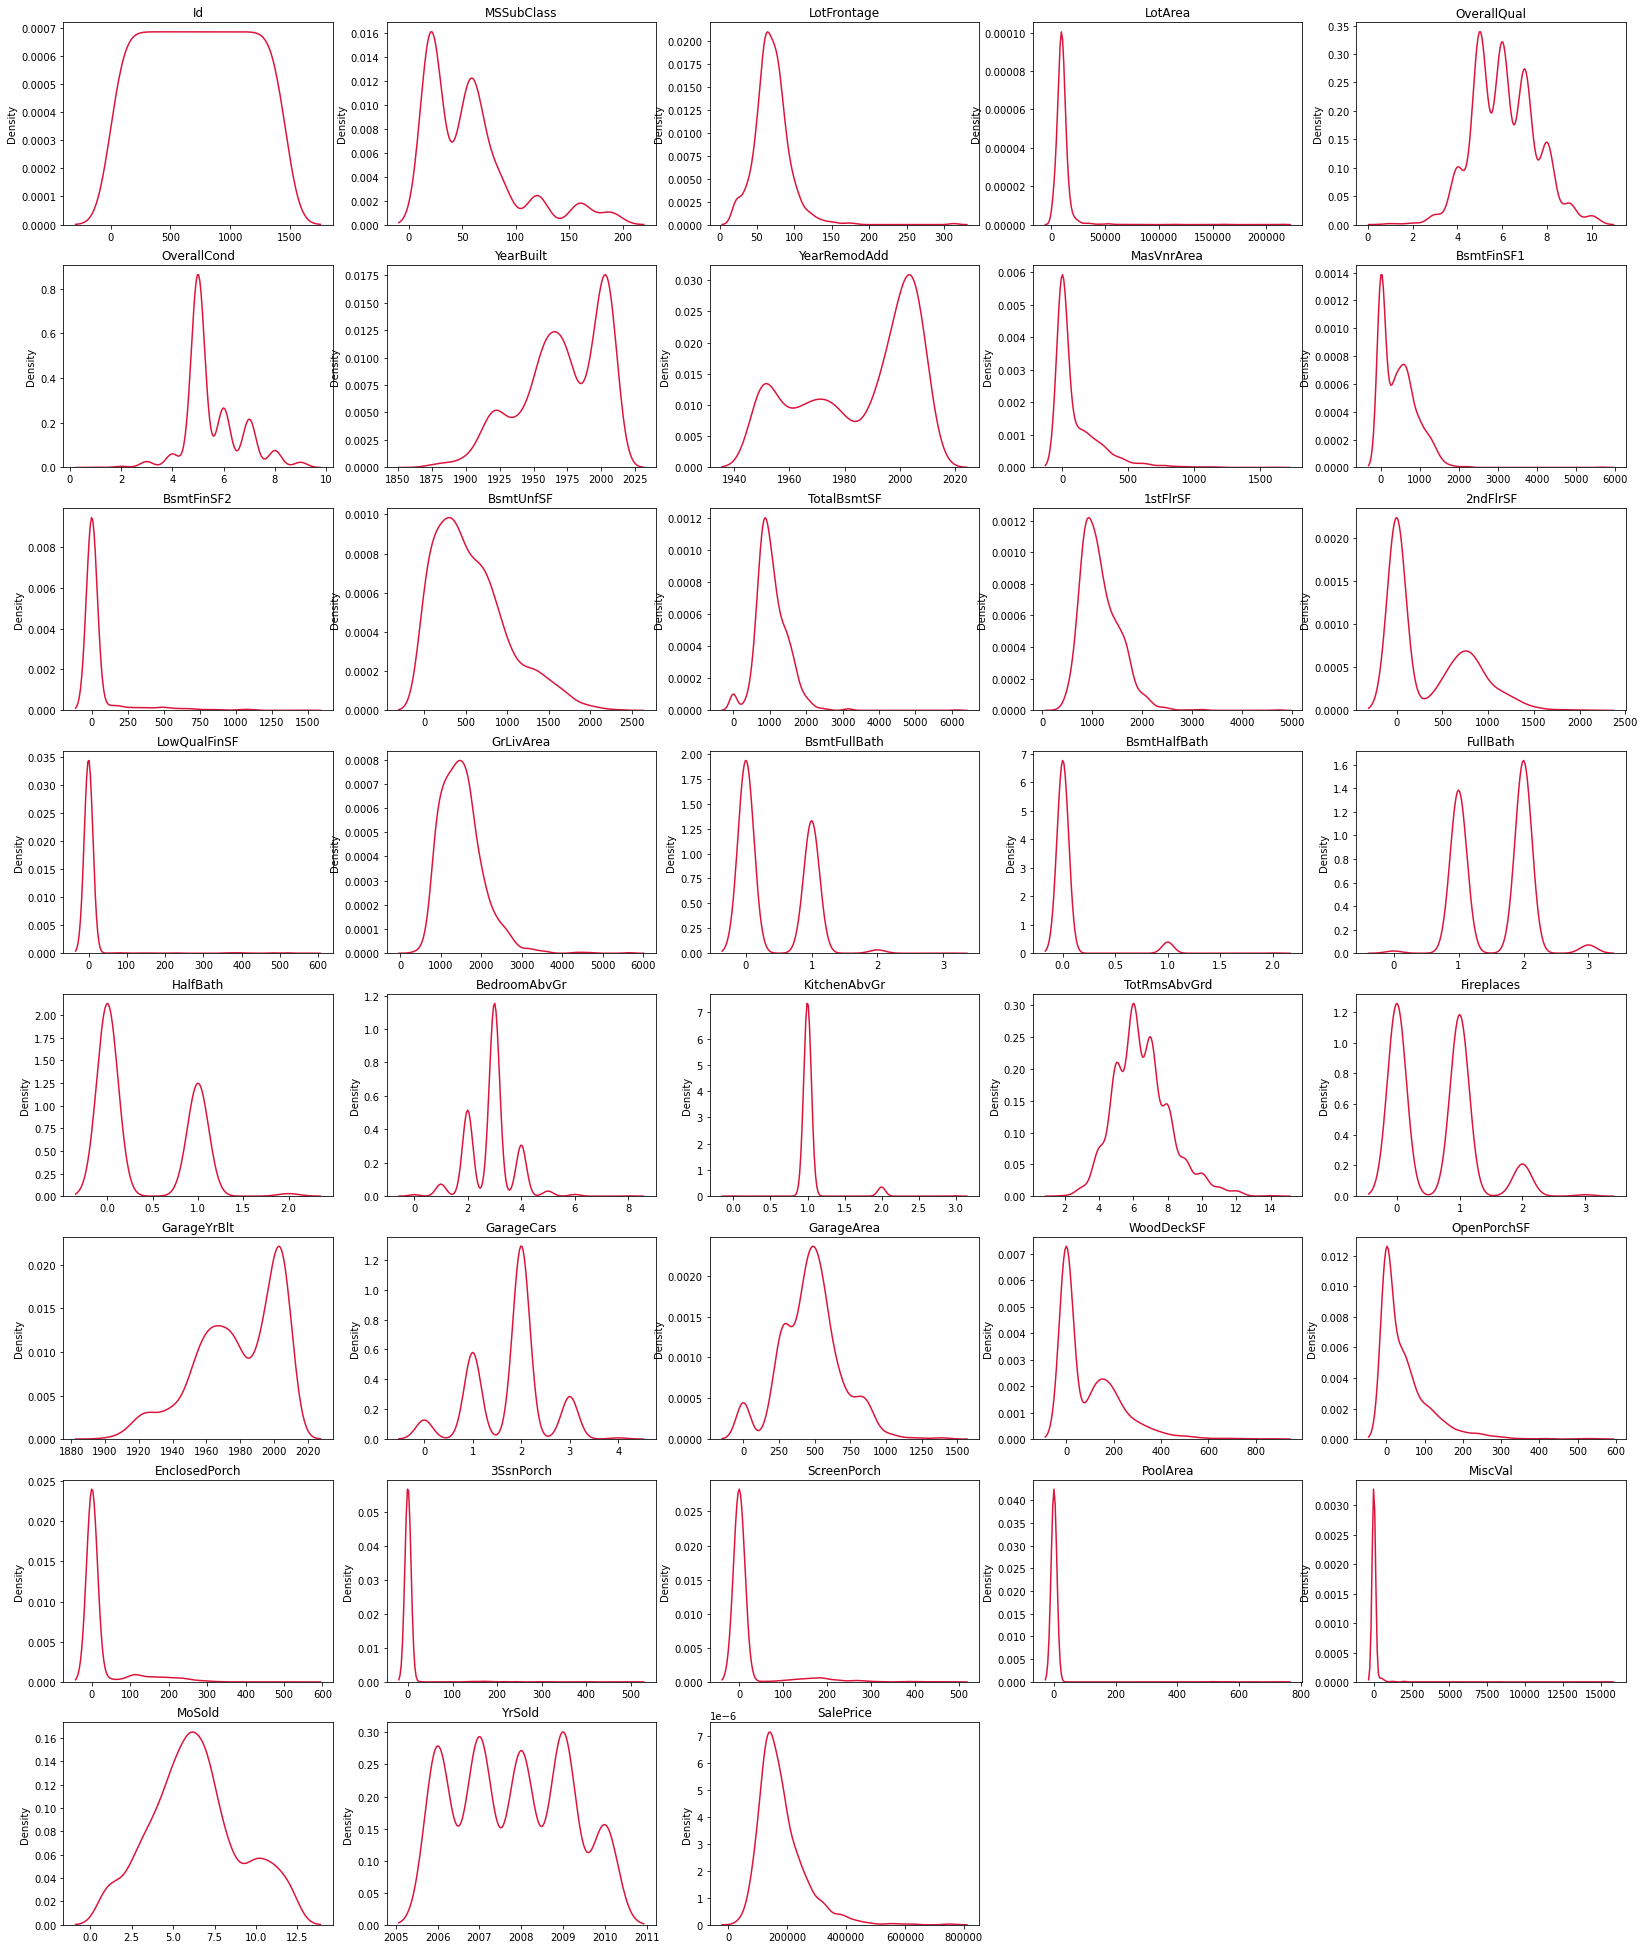

In [213]:
f = plt.figure(figsize=(28, 35))
for j,i in zip(n,range(38)):
    f.add_subplot(8, 5, i+1)
    hist = df1[j].values.tolist()
    sns.distplot(hist, hist=False,color='crimson')
    plt.title(j)
plt.show()

plot Heatmap for all the remaining numerical data including the 'SalePrice'

In [268]:
df2=pd.DataFrame()
for i in n:
    df2[n]=df1[n]

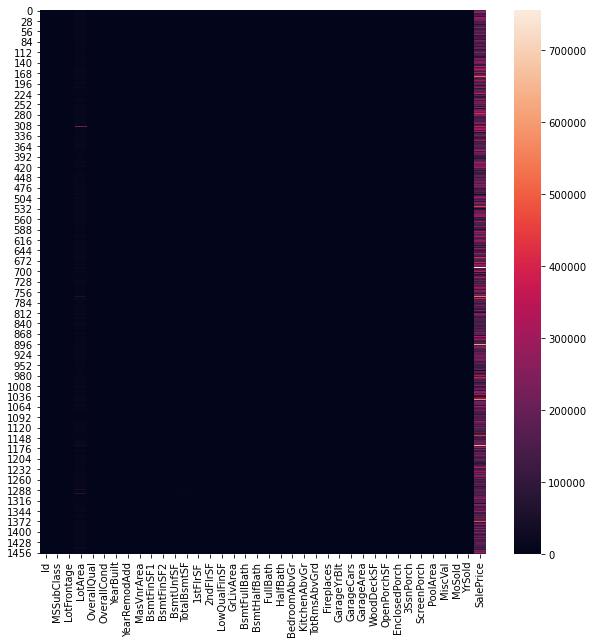

In [282]:
f = plt.figure(figsize=(10, 10))
sns.heatmap(df2, color='crimson')
plt.show()

From the distribution of each numerical variables as well as the heatmap you can notice columns that are important and correlated (correlation higher than absolute 0.3) with our target variable 'SalePrice'. select columns where the correlation with 'SalePrice' is higher than |0.3|


In [158]:
for c in n[:-1]:
    col,sale = df1[c],df1['SalePrice']
    corr = np.mean((col-np.mean(col))*(sale-np.mean(sale)))/np.std(col)/np.std(sale)
    if abs(corr)>0.3: print('{} with corr of {}.'.format(c,np.round(corr,2)))

LotFrontage with corr of 0.37.
OverallQual with corr of 0.79.
YearBuilt with corr of 0.52.
YearRemodAdd with corr of 0.51.
MasVnrArea with corr of 0.48.
BsmtFinSF1 with corr of 0.39.
TotalBsmtSF with corr of 0.61.
1stFlrSF with corr of 0.61.
2ndFlrSF with corr of 0.32.
GrLivArea with corr of 0.71.
FullBath with corr of 0.56.
TotRmsAbvGrd with corr of 0.53.
Fireplaces with corr of 0.47.
GarageYrBlt with corr of 0.48.
GarageCars with corr of 0.64.
GarageArea with corr of 0.62.
WoodDeckSF with corr of 0.32.
OpenPorchSF with corr of 0.32.


Now choose Features with high correlation (higher than 0.5) and plot the correlation of each feature with SalePrice

In [174]:
Col=[]
for c in n[:-1]:
    col,sale = df1[c],df1['SalePrice']
    corr = np.mean((col-np.mean(col))*(sale-np.mean(sale)))/np.std(col)/np.std(sale)
    if abs(corr)>0.5: Col.append(c)

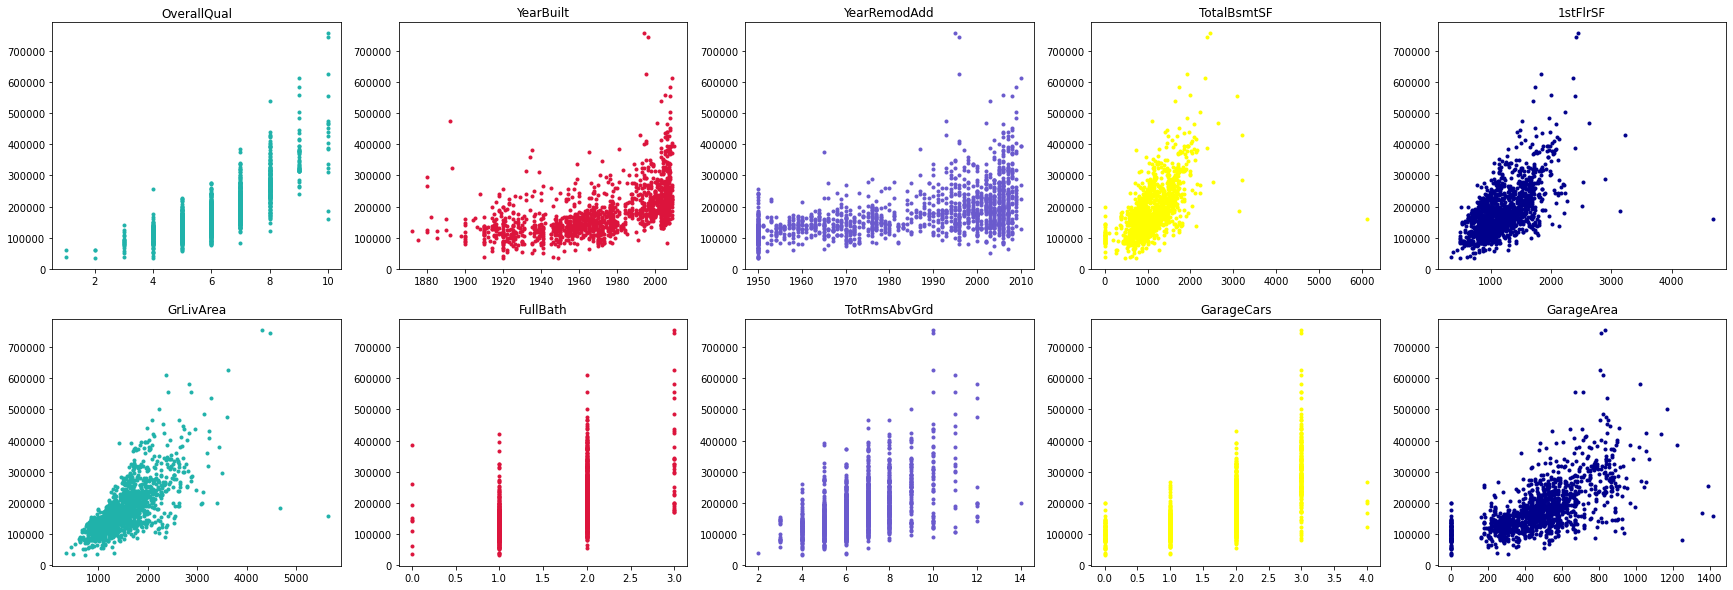

In [173]:
fig = plt.figure(figsize=(30, 10))
for x,axis,c in zip(Col,range(1,11),['lightseagreen','crimson','slateblue','yellow','darkblue','lightseagreen','crimson','slateblue','yellow','darkblue']):
    ax =  fig.add_subplot(2, 5, axis )
    plt.scatter(df1[x],df1['SalePrice'],color=c,marker='.')
    plt.title(x)

Check the NaN of dataframe set by ploting percent of missing values per column and plot the result

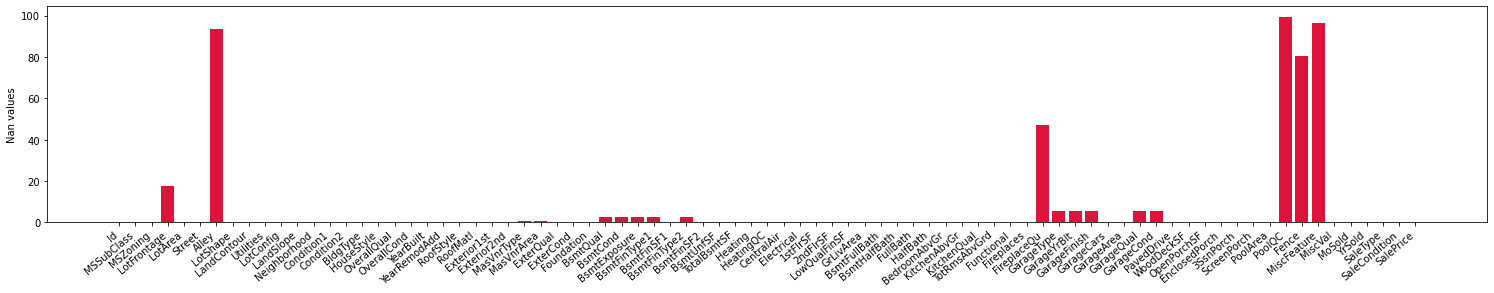

In [145]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_axes([0,0,1,1])

nan = np.array(df1.isnull().sum())/len(df1)*100  ;  name = list(df1.columns)
ax.bar(name,nan,color='crimson')
ax.set_xticklabels(name, rotation=40, ha="right")
ax.set_ylabel('Nan values')
plt.tight_layout()
plt.show()

in the last session I think Amirreza said that droping Nan cells is not suited in many projects cause
it can remove alots of information of your dataframe. ofcourse he is right and I would like to give a short introduction to the process of handling Nan cells which is called "Imputation". Data imputation is the substitution of estimated values for missing or inconsistent data items (fields). The substituted values are intended to create a data record that does not fail edits. here you can use Simple_

In [205]:
my_imputer = SimpleImputer(strategy="median")
name = [i for i in n]
df_numerical = df1.loc[:,name]
df_filled = pd.DataFrame(my_imputer.fit_transform(df_numerical))
df_filled.columns=df_numerical.columns ; df_filled.index=df_numerical.index
idf.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Categorical features

## Explore and clean Categorical features

find all Catagorical columns. you can use the code for finding the numerical columns and just using 'object' for dtype.

In [214]:
n = df1.select_dtypes(include=['object']).columns

Countplot for each of the categorical features in the train set

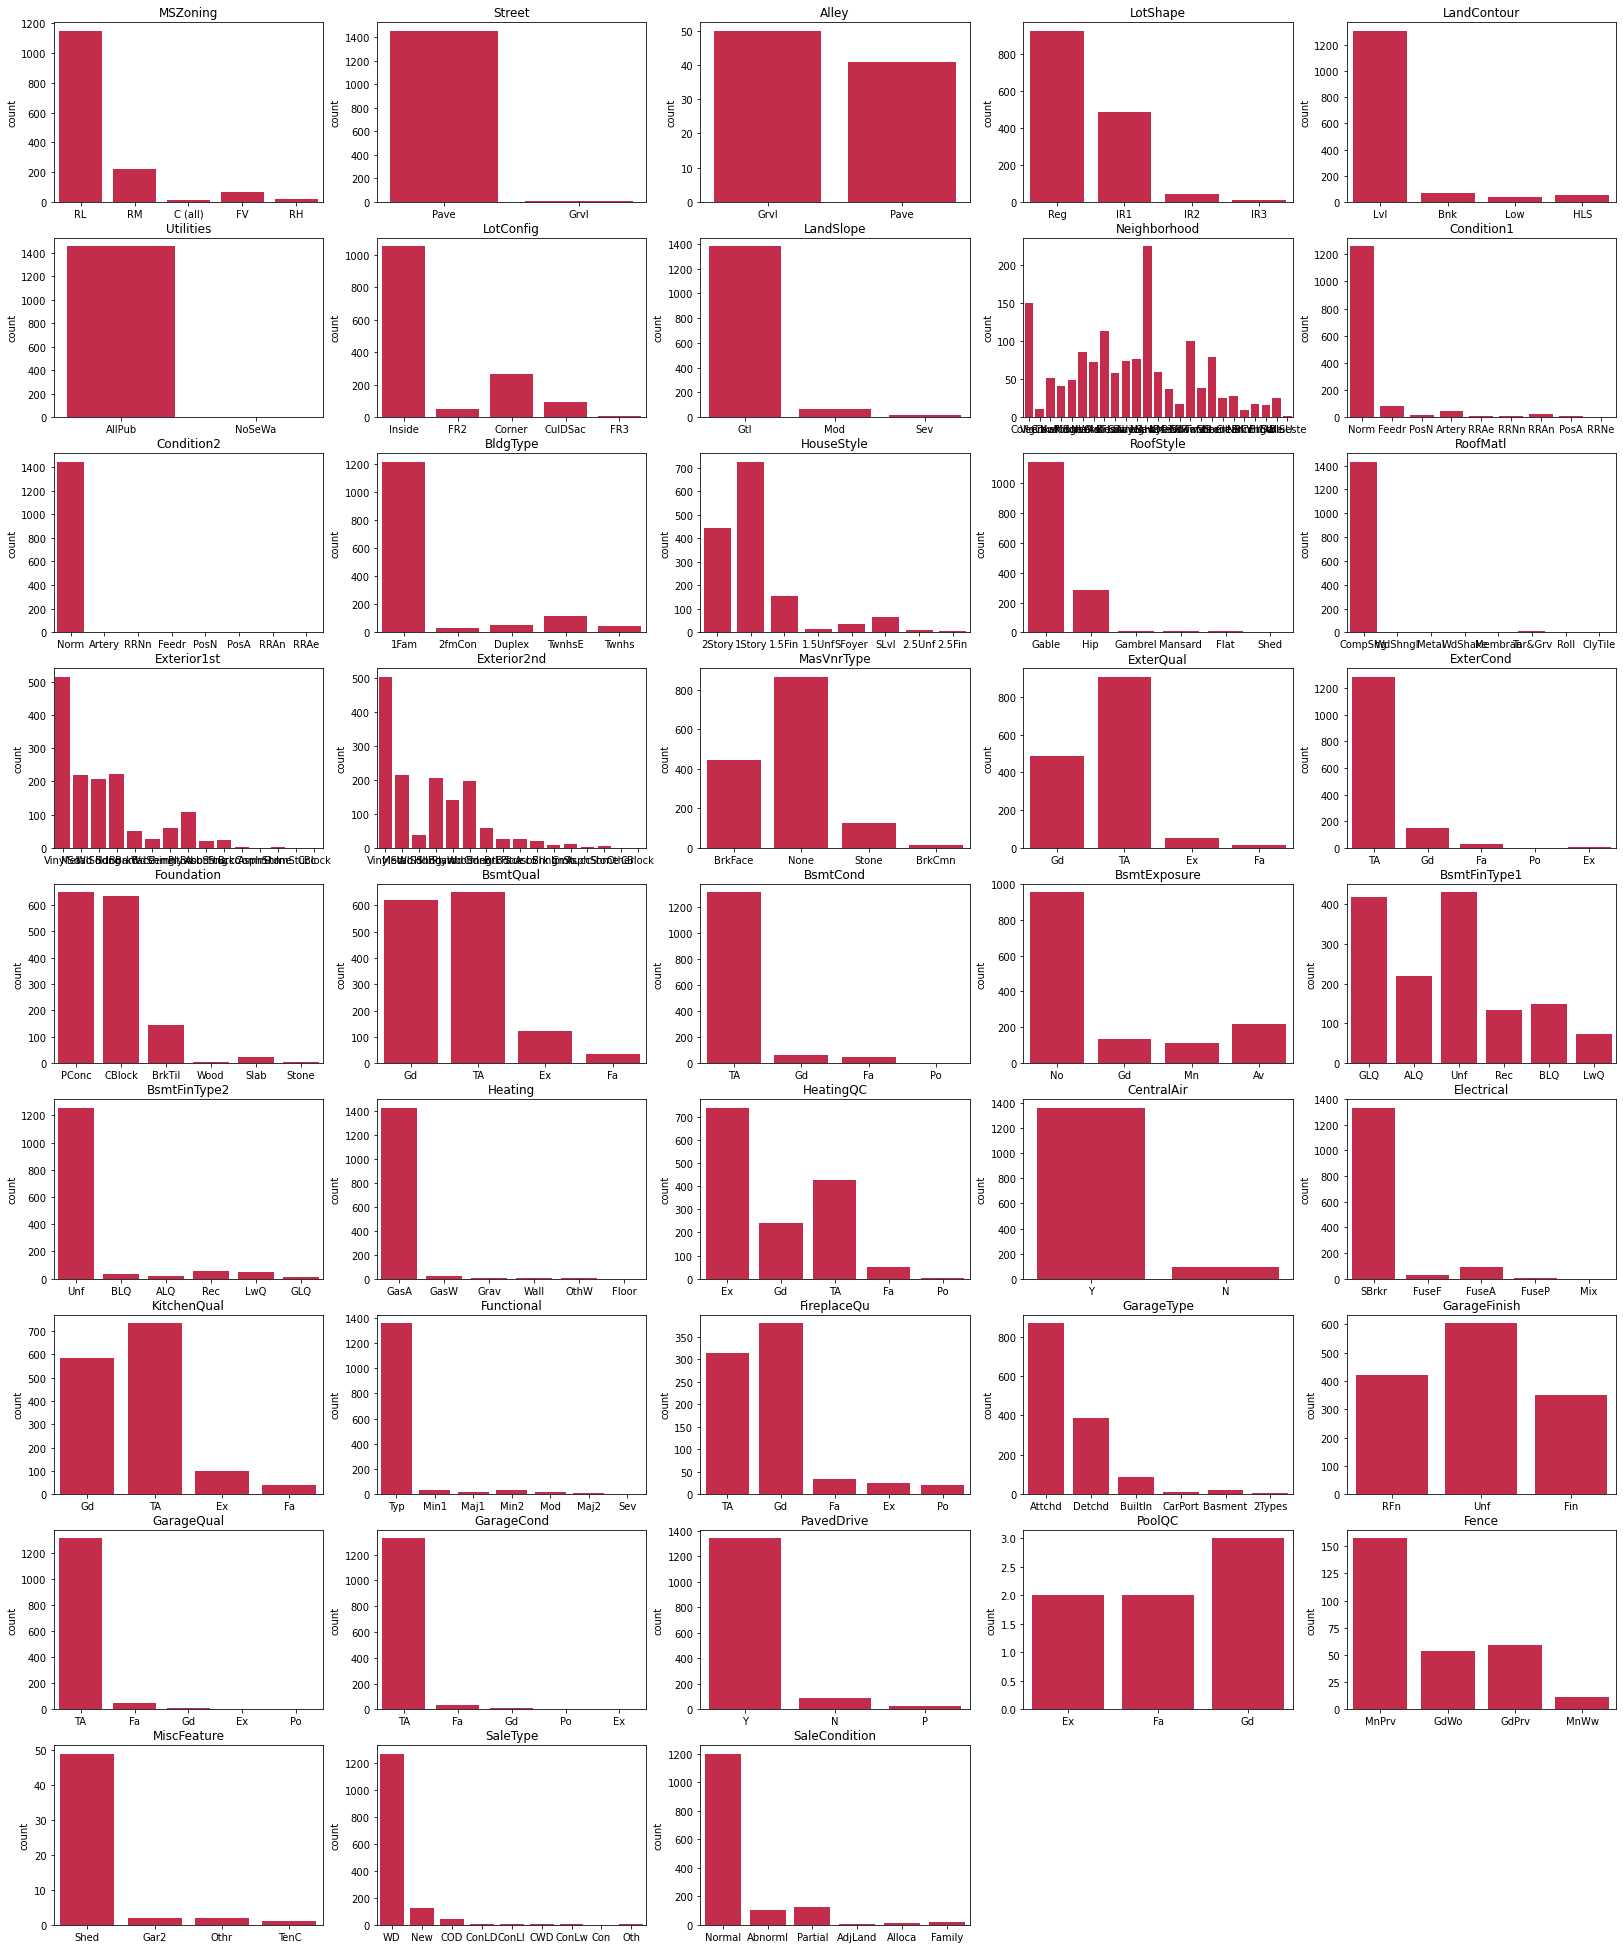

In [215]:
f = plt.figure(figsize=(28, 35))
for j,i in zip(n,range(43)):
    f.add_subplot(9, 5, i+1)
    cou = df1[j].values.tolist()
    sns.countplot(cou,color='crimson')
    plt.title(j)
plt.show()